In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv

In [2]:
#kdd = pd.read_csv('../../Data/kddcup.data_10_percent_corrected',header=None )
with open('../../Data/kddcup.names.txt') as f:
    reader = csv.reader(f,delimiter = ':')
    class_label = next(reader,None)
    headerRow = [column[0] for column in reader]
    headerRow = headerRow+['classLabel']
    kdd = pd.read_csv('../../Data/kddcup.data_10_percent_corrected',header=None)
    kdd.columns=headerRow

In [3]:
kdd.shape

(494021, 42)

In [4]:
## Dictionary of General category and Attacks
## Portsweeping = 10413  --> 1114  (Probing)
## back         = 2203   --> 1114  (DOS)
## smurf        = Large   --> 1114  (DOS) 
## neptune      = 'Large'  --> 1114  (DOS)
## satan        =  15892 --> 1114 (Probing)
## ipsweep      = 12481 -- 1114 (Probing)
## land         =  21 -->       (DOS)
## nmap         =  2316 --> 1114   (Probing)
## multihop     =  4    (R2L)
## TearDrop     = 979   (Probing)
## Pod          = 264   (DOS)
## guess_passwd = 53    (R2L)
## buffer_overflow = 30 (U2R) 
## warezmaster = 20     (R2L)
## imap        = 12     (Probing)
## rootkit     = 10 (Probing)
## loadmodule  = 9  (U2R)
## ftp_write   = 8  (R2L)
## multihop    = 7  (R2L)
## phf         = 4  (R2L)
## perl        = 3  (U2R) 
## spy         = 2 (R2L)
categories = {
                'normal.':'Normal',
                'buffer_overflow.':'U2R',
                'loadmodule.':'U2R',
                'perl.':'U2R',
                'neptune.':'DOS',
                'smurf.':'DOS',
                'guess_passwd.':'R2L',
                'pod.':'DOS',
                'teardrop.':'DOS',
                'portsweep.':'Probing',
                'ipsweep.':'Probing',
                'land.':'DOS',
                'ftp_write.':'R2L',
                'back.':'DOS',
                'imap.':'Probing',
                'satan.':'Probing',
                'phf.':'R2L',
                'nmap.':'Probing',
                'multihop.':'R2L',
                'warezmaster.':'R2L',
                'warezclient.':'R2L',
                'rootkit.':'U2R',
                'spy.':'R2L'
            }

kdd['category'] = kdd['classLabel'].map(categories)
 
## Group by General Category and detailed class Label
groupClassLabel = kdd.groupby('classLabel').count()['duration'].sort_values(ascending = False)
groupCategory = kdd.groupby('category').count()['duration'].sort_values(ascending = False)


In [5]:
groupClassLabel

classLabel
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: duration, dtype: int64

In [6]:
## Piechart and barchart
glc = ['DOS','Normal','Probing','R2L','U2R']
for j, i in zip(glc,groupCategory):
    print(j,": ",i,"(", round((i/kdd.shape[0])*100),"%)")

DOS :  391458 ( 79 %)
Normal :  97278 ( 20 %)
Probing :  4119 ( 1 %)
R2L :  1114 ( 0 %)
U2R :  52 ( 0 %)


In [22]:
## Making class label propotionate
## Lets select R2L 


In [7]:
kdd_R2L = kdd.loc[kdd['category'] == 'R2L']
kdd_Probing = kdd.loc[kdd['category'] == 'Probing'][:1114]
kdd_Normal = kdd.loc[kdd['category'] == 'Normal'][:1114]
kdd_DOS = kdd.loc[kdd['category'] == 'DOS'][:1114]


In [8]:
dataframes = [kdd_R2L,kdd_Probing,kdd_Normal,kdd_DOS]
kdd_prop = pd.concat(dataframes)
kdd_prop.head()
len(kdd_prop)

4456

In [9]:
kdd_prop.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,classLabel,category
15699,23,tcp,telnet,SF,104,276,0,0,0,0,...,1.0,0.0,1.00,1.0,0.00,0.00,0.00,0.00,guess_passwd.,R2L
22750,60,tcp,telnet,S3,125,179,0,0,0,1,...,1.0,0.0,1.00,0.0,1.00,1.00,0.00,0.00,guess_passwd.,R2L
22751,0,tcp,telnet,RSTO,125,179,0,0,0,1,...,1.0,0.0,0.50,0.0,0.50,0.50,0.50,0.50,guess_passwd.,R2L
22752,0,tcp,telnet,RSTO,125,179,0,0,0,1,...,1.0,0.0,0.33,0.0,0.33,0.33,0.67,0.67,guess_passwd.,R2L
22753,0,tcp,telnet,RSTO,125,179,0,0,0,1,...,1.0,0.0,0.25,0.0,0.25,0.25,0.75,0.75,guess_passwd.,R2L


In [10]:
#1. Unique Values
print("Unique values of service: ",kdd_prop.service.unique(),"\n")
print("Unique values of flag: ",kdd_prop.flag.unique(),"\n")
print("Unique values of land: ",kdd_prop.land.unique(),"\n")
print("Unique values of logged_in: ",kdd_prop.logged_in.unique(),"\n")
print("Unique values of is_host_login: ",kdd_prop.is_host_login.unique(),"\n")
print("Unique values of is_guest_login: ",kdd_prop.is_guest_login.unique(),"\n")

Unique values of service:  ['telnet' 'ftp' 'login' 'ftp_data' 'http' 'other' 'private' 'rje' 'smtp'
 'time' 'mtp' 'link' 'remote_job' 'gopher' 'ssh' 'name' 'finger' 'whois'
 'domain' 'imap4' 'domain_u' 'daytime' 'eco_i' 'ctf' 'pop_3' 'nntp'
 'ecr_i' 'systat' 'hostnames' 'sunrpc' 'netstat' 'supdup' 'csnet_ns'
 'vmnet' 'auth' 'ntp_u'] 

Unique values of flag:  ['SF' 'S3' 'RSTO' 'RSTR' 'S2' 'REJ' 'RSTOS0' 'S0' 'SH' 'S1' 'OTH'] 

Unique values of land:  [0] 

Unique values of logged_in:  [0 1] 

Unique values of is_host_login:  [0] 

Unique values of is_guest_login:  [0 1] 



In [11]:
## Exploration of attributes and find connection between different variables

##Our results indicate that normal, neptune and smurf classes are highly related to certain features that make their classification easier. Since these three classes make up 98% of the training data, it is very easy for a machine learning algorithm to achieve good results.

In [13]:
## Pre processing
## Need to perform to encoding of the data set since it nominal into numerical for AI models
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
## Encoding Service
le.fit(kdd_prop.service)
kdd_prop['service']= le.transform(kdd_prop.service)

## Encoding Flag
le.fit(kdd_prop.flag)
kdd_prop['flag'] = le.transform(kdd_prop.flag)

le.fit(kdd_prop.protocol_type)
kdd_prop['protocol_type'] = le.transform(kdd_prop.protocol_type)



In [15]:
##  Training - Testing Split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

#X = np.array(kdd_prop.drop(['category','classLabel'], axis = 1))
#y = np.array(kdd_prop['category'])

X = kdd_prop.drop(['category','classLabel'], axis = 1)
y = kdd_prop['category']
# Train - Test split (70% and 30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Machine Learning Model
clf = ExtraTreesClassifier()

# Fitting X
clf = clf.fit(X, y)

# Feature Importance
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), headerRow), 
             reverse=True))

Features sorted by their score:
[(0.1311, 'count'), (0.1141, 'logged_in'), (0.0914, 'srv_diff_host_rate'), (0.0837, 'dst_host_same_src_port_rate'), (0.0711, 'dst_host_srv_count'), (0.0685, 'srv_count'), (0.061, 'protocol_type'), (0.0598, 'dst_host_same_srv_rate'), (0.052, 'dst_host_srv_diff_host_rate'), (0.0518, 'service'), (0.036, 'dst_host_count'), (0.0299, 'hot'), (0.0212, 'srv_rerror_rate'), (0.0185, 'is_guest_login'), (0.0139, 'rerror_rate'), (0.0134, 'dst_host_rerror_rate'), (0.0126, 'src_bytes'), (0.0123, 'dst_bytes'), (0.0121, 'dst_host_diff_srv_rate'), (0.0075, 'dst_host_serror_rate'), (0.0074, 'srv_serror_rate'), (0.0064, 'dst_host_srv_serror_rate'), (0.0052, 'serror_rate'), (0.0052, 'num_failed_logins'), (0.0052, 'duration'), (0.0025, 'same_srv_rate'), (0.0019, 'dst_host_srv_rerror_rate'), (0.0018, 'flag'), (0.0008, 'root_shell'), (0.0007, 'num_access_files'), (0.0004, 'diff_srv_rate'), (0.0001, 'urgent'), (0.0001, 'num_root'), (0.0001, 'num_file_creations'), (0.0001, 'num_c

In [ ]:
## PCA analysis

In [43]:
## Machine Learning Models

Accuracy is:  0.9947643979057592


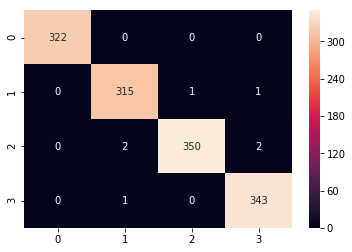

In [16]:

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
#X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#random forest classifier with n_estimators 
clf_rf = RandomForestClassifier()      
clr_rf = clf_rf.fit(X_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(X_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(X_test))

sns.heatmap(cm, annot=True, fmt='d')

Accuracy is:  0.9917726252804787


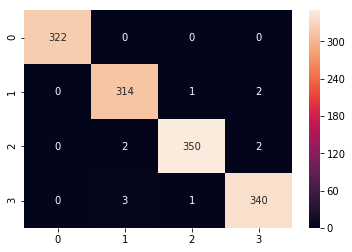

In [46]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
predictions = dtree.predict(X_test)
ac = accuracy_score(y_test,predictions)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.46297681376215405


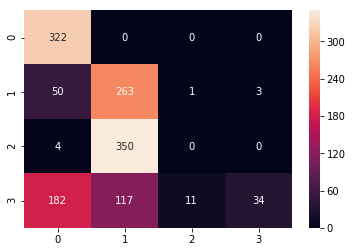

In [48]:
## Gaussian NB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions_gnb = gnb.predict(X_test)
ac = accuracy_score(y_test,predictions_gnb)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, predictions_gnb)

sns.heatmap(cm,annot = True , fmt = "d")

Accuracy is:  0.8825729244577412


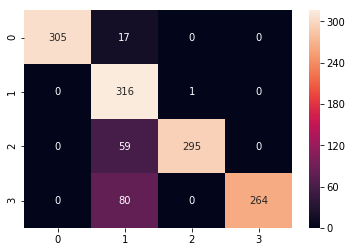

In [54]:
## Support Vector Machine
clf_svc = SVC()
    
clr_svc = clf_svc.fit(X_train,y_train)
prediction = clf_svc.predict(X_test)
ac = accuracy_score(y_test,prediction)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,prediction)
sns.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.9798055347793567


/Users/AkshayKale/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/Users/AkshayKale/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


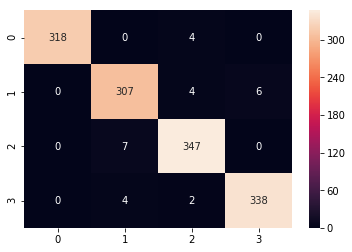

In [49]:
ld = LinearDiscriminantAnalysis()
ld.fit(X_train, y_train)
predictions_ld = ld.predict(X_test)
ac = accuracy_score(y_test,predictions_ld)
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test, predictions_ld)
sns.heatmap(cm,annot = True , fmt = "d")

In [26]:
## find relevant features to classify for each label and create a list
## we might be able create a list and find with help of domain knowledge how they are related to each other
## and how do they help us classify into these classes

from sklearn import tree
import graphviz 
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns) 
graph = graphviz.Source(dot_data) 

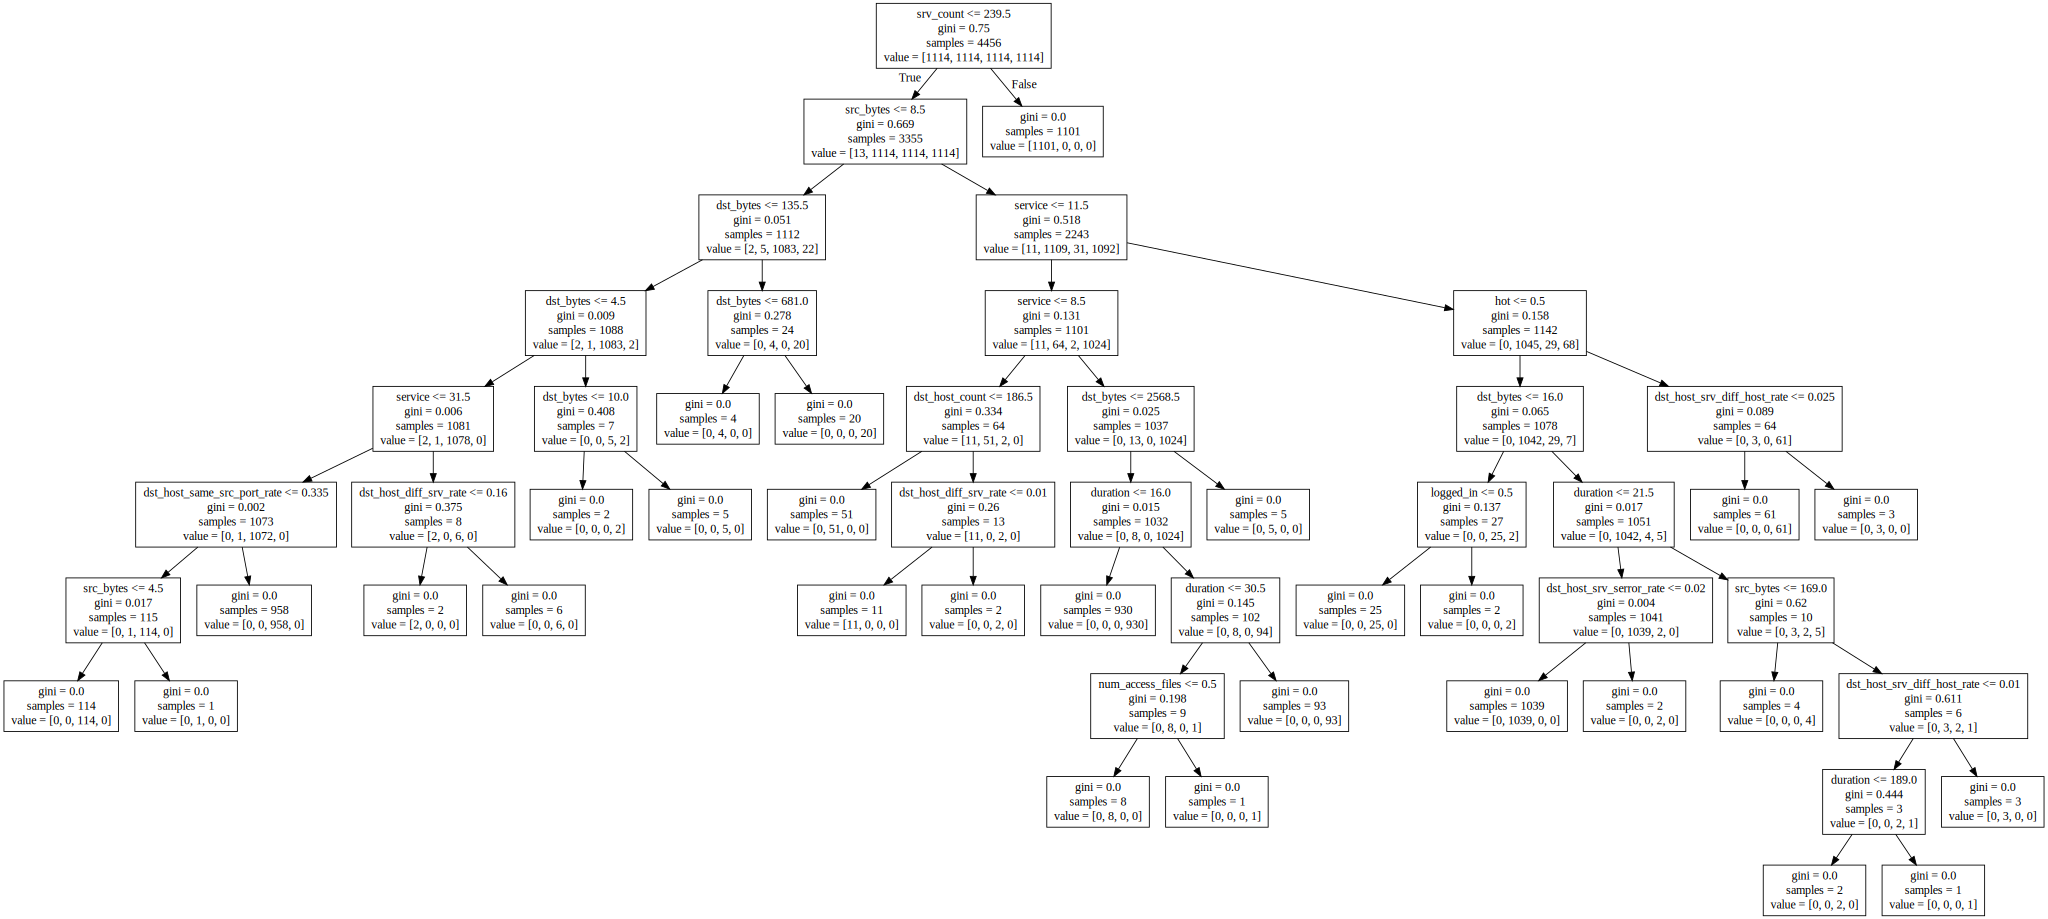

In [24]:
graph

In [25]:
## To explain better
## Link: http://benalexkeen.com/decision-tree-classifier-in-python-using-scikit-learn/